In [74]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
%matplotlib inline

In [75]:
df = pd.read_csv('data/BlackFriday.csv')

In [76]:
print(df.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [77]:
df.shape

(537577, 12)

In [78]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


The first thing we can notice when we print our data is that there are 537577 transactions in total. We can also see that of all of them there are only 370591 transactions with 2 categories and 164278 with 3 categories.

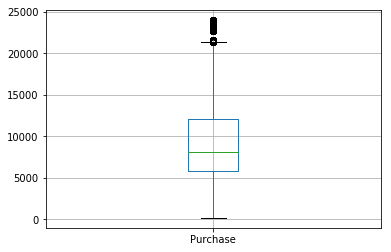

In [80]:
# detect outliers
df.boxplot(column='Purchase', return_type='axes')

In [81]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Cleaning only Null data of Product_Category_2 so we can make a Linear Regression to predict all null values in the table

In [82]:
product_2_free = df[pd.notnull(df['Product_Category_2'])]
print(product_2_free.head())

   User_ID Product_ID Gender    Age  Occupation City_Category  \
1  1000001  P00248942      F   0-17          10             A   
3  1000001  P00085442      F   0-17          10             A   
5  1000003  P00193542      M  26-35          15             A   
6  1000004  P00184942      M  46-50           7             B   
7  1000004  P00346142      M  46-50           7             B   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
1                          2               0                   1   
3                          2               0                  12   
5                          3               0                   1   
6                          2               1                   1   
7                          2               1                   1   

   Product_Category_2  Product_Category_3  Purchase  
1                 6.0                14.0     15200  
3                14.0                 NaN      1057  
5                 2.0                 

In [83]:
product_categories_1 = product_2_free.Product_Category_1.values
product_categories_2 = product_2_free.Product_Category_2.values
# We reshape it so we can fit them into the linear regression.
product_categories_1 = product_categories_1.reshape(len(product_categories_1), 1)
product_categories_2 = product_categories_2.reshape(len(product_categories_2), 1)

In [84]:
product_regression = linear_model.LinearRegression()
product_regression.fit(product_categories_1, product_categories_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

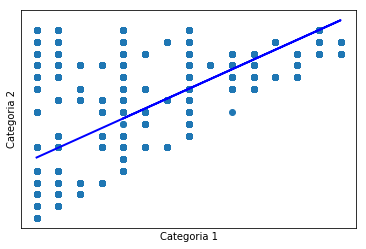

In [87]:
plt.scatter(product_categories_1, product_categories_2)
plt.plot(product_categories_1, product_regression.predict(product_categories_1), color='blue', linewidth=2)
plt.xlabel("Categoria 1")
plt.ylabel("Categoria 2")
plt.xticks(())
plt.yticks(())
plt.show()

In [88]:
print(product_regression.intercept_)
print(product_regression.coef_)

[6.30085306]
[[0.83582656]]


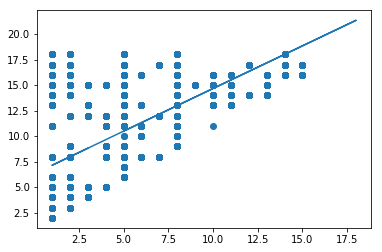

In [89]:
category_1 = df.Product_Category_1.values
category_1 = category_1.reshape(len(category_1), 1)
category_2_prediction = product_regression.predict(category_1)
plt.scatter(product_categories_1, product_categories_2)
plt.plot(category_1, category_2_prediction)
plt.show()

In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


In [91]:
data_reloaded = df.copy()
data_reloaded.Product_Category_2 = category_2_prediction
print(data_reloaded.info())
# Como podemos ver no hay valores nulos en la categoria 2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB
None


In [94]:
print(data_reloaded.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0            8.808333                 NaN      8370  
1            7.136680                14.0     15200  
2           16.330772                 NaN   

In [56]:
export_csv = df.to_csv('data/export.csv', index=None, header=True)  #Don't forget to add '.csv' at the end of the path
